In [3]:
import sys,os
sys.path.append(os.path.abspath(os.path.join(sys.path[0], 'utils')))
sys.path.append(os.path.abspath(os.path.join(sys.path[0], 'db_helper')))
sys.path.append('../')
from mongo_helper import *
from utils import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
test = Job(client = pymongo.MongoClient("mongodb://localhost:27017/") ,db = pymongo.MongoClient("mongodb://localhost:27017/")["Job_Aggregator"])

In [5]:
data = test.getJobData('site_job')

In [6]:
df = pd.DataFrame.from_records(data)
df.reset_index(level=0, inplace=True)

In [7]:
def normalizeCity(city):
    city = city.replace('Khu vực: ','')
    if 'Hà Nội' in city and 'Hồ Chí Minh' not in city or 'Ha Noi' in city:
        return 'Hà Nội'
    if 'Hồ Chí Minh' in city and 'Hà Nội' not in city or 'Ho Chi Minh' in city:
        return 'Tp Hồ Chí Minh'
    if city == '':
        return 'remote'
    return city
def getMonthYear(date_str):
    month = date_str.split('/')[1]
    if month[0] == '0':
        month = month.replace('0','')
    year = date_str.split('/')[2]
    return  month + '-' + year
# print(normalizeCity('Khu vực: An Giang, Bạc Liêu, Bến Tre, Cà Mau, Cần Thơ, Đồng Tháp, Hậu Giang, Kiên Giang, Sóc Trăng, Tiền Giang, Trà Vinh, Vĩnh Long'))

In [8]:
#thong ke viec lam theo thanh pho

city = df['city'].apply(normalizeCity).value_counts()
print(city[:5])
print(type(city))

Hà Nội                 6461
Tp Hồ Chí Minh         5094
Đà Nẵng                 203
Hà Nội, Hồ Chí Minh     194
Bình Dương              102
Name: city, dtype: int64
<class 'pandas.core.series.Series'>


In [9]:
top5_city = city[:5]

<AxesSubplot:title={'center':'top 5 region with the most recruitment'}>

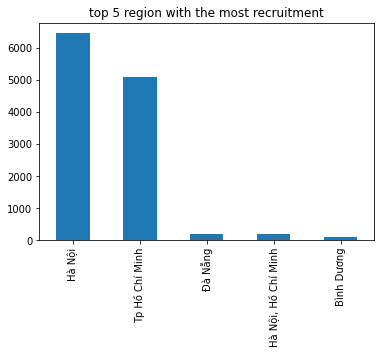

In [10]:
top5_city.plot(x ='city',y='num_job', kind = 'bar',title = 'top 5 region with the most recruitment')

In [11]:
df['month'] = df['update_time'].apply(getMonthYear)

<AxesSubplot:title={'center':'recruiment news of first 3 months 2021'}>

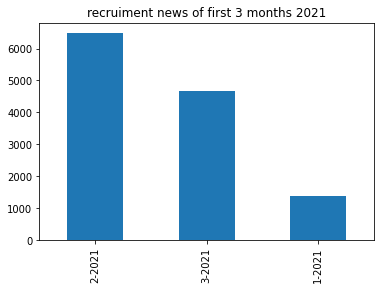

In [12]:
monthly_recruitment = df['month'].value_counts()
monthly_recruitment[:3].plot(kind = 'bar',title = 'recruiment news of first 3 months 2021')

In [13]:
def titleNormalize(title):
    it_title = ['python','frontend','Java','.Net','tester','data engineer','iOS','React Native','PHP','Nodejs','golang','Ui/Ux','Backend']
    for keyword in it_title:
        if keyword in title:
            return keyword
    return title

<AxesSubplot:title={'center':'top recruitment title'}>

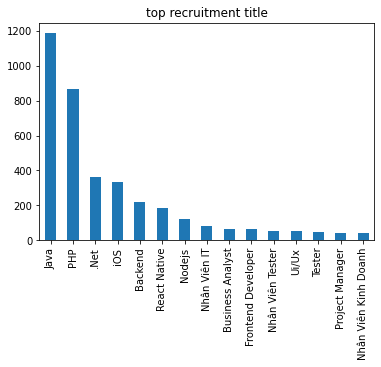

In [14]:
df['title'] = df['title'].apply(titleNormalize)
df['title'].value_counts()[:15].plot(kind = 'bar',title = 'top recruitment title')

In [15]:
len(df[df['salary'] != '']['salary'])

3174

<AxesSubplot:title={'center':'Top 15 company with most recruitment news'}>

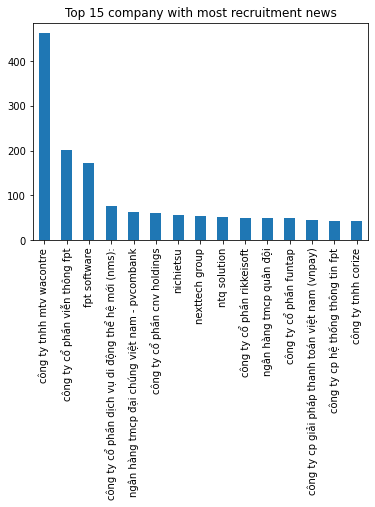

In [16]:
top_company = df['company'].apply(lambda x: x.lower()).value_counts()[:20]
top_company[:15].plot(kind = 'bar',title = 'Top 15 company with most recruitment news')

In [17]:
df

,index,_id,url,title,img,city,salary,update_time,company,month
0,0,6044347f5148e140475143f9,https://www.topcv.vn/viec-lam/chuyen-vien-seo-...,Chuyên Viên Seo Marketing (Thu Nhập 10 - 15 Tr...,https://static.topcv.vn/company_logos/cong-ty-...,Khu vực: Hà Nội,,07/03/2021,CÔNG TY TNHH THƯƠNG MẠI VÀ XÂY LẮP MEIKO,3-2021
1,1,6044347f5148e140475143fa,https://www.topcv.vn/viec-lam/it-recruiter-chu...,IT Recruiter - Chuyên Viên Tuyển Dụng,https://static.topcv.vn/company_logos/cong-ty-...,Khu vực: Hà Nội,,07/03/2021,Công ty cổ phần dịch vụ Thành Công Software,3-2021
2,2,6044347f5148e140475143fb,https://www.topcv.vn/viec-lam/front-end-develo...,Front-End Developer (Lập Trình Viên Frontend),https://static.topcv.vn/company_logos/cong-ty-...,Khu vực: Hà Nội,,07/03/2021,Công ty cổ phần công nghệ BLAMEO Việt Nam,3-2021
3,3,6044347f5148e140475143fc,https://www.topcv.vn/viec-lam/nhan-vien-kinh-d...,Nhân Viên Kinh Doanh (Thu Nhập 10 - 20 Triệu),https://static.topcv.vn/company_logos/cong-ty-...,Khu vực: Hà Nội,,07/03/2021,Công ty Cổ phần Công nghệ và Giải pháp trực tu...,3-2021
4,4,6044347f5148e140475143fd,https://www.topcv.vn/viec-lam/lap-trinh-vien-p...,PHP,https://static.topcv.vn/company_logos/cong-ty-...,Khu vực: Hà Nội,,07/03/2021,Công ty khởi nghiệp công nghệ Nội Dung Số,3-2021
...,...,...,...,...,...,...,...,...,...,...
12885,12885,60443746b94051b3e825b80d,https://itviec.com/it-jobs/agile-delivery-coor...,Agile Delivery Coordinator,https://itviec.com/rails/active_storage/repres...,Ho Chi Minh,,12/01/2021,Be Group Vietnam Small Logo,1-2021
12886,12886,60443746b94051b3e825b80e,https://itviec.com/it-jobs/03-ai-machine-learn...,03 AI/ Machine Learning Engineers,https://itviec.com/rails/active_storage/repres...,Ho Chi Minh,,12/01/2021,Vulcan Labs Vietnam Small Logo,1-2021
12887,12887,60443746b94051b3e825b80f,https://itviec.com/it-jobs/05-sr-android-devel...,05 Sr Android Developers - Up to $2000,https://itviec.com/rails/active_storage/repres...,Ho Chi Minh,,12/01/2021,Vulcan Labs Vietnam Small Logo,1-2021
12888,12888,60443746b94051b3e825b810,https://itviec.com/it-jobs/04-sr-ios-developer...,iOS,https://itviec.com/rails/active_storage/repres...,Ho Chi Minh,,12/01/2021,Vulcan Labs Vietnam Small Logo,1-2021
